In [2]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [33]:
wine = pd.read_csv("wine.csv")

wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [34]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [35]:
#in Type column not given useful data so drop the column by using iloc
wine1=wine.iloc[:,1:]
wine1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
# Considering only numerical data 
WINE=wine1.values
#uni.data.head()
# Converting into numpy array
#DF = df.data.value
WINE

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [38]:
#normilization the data and use scale function
wine_norm=scale(WINE)
wine_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [39]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_norm)
pca_values 

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [40]:
#loadings or weights
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [41]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [42]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

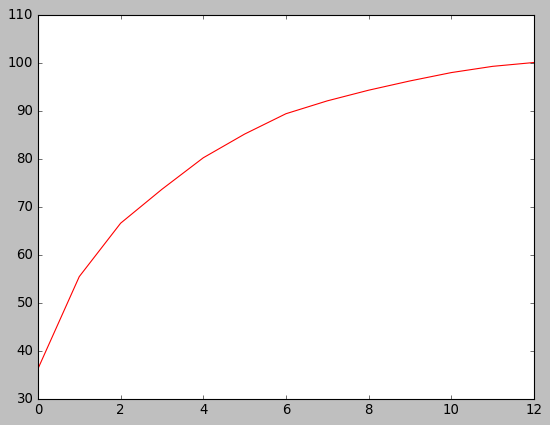

In [43]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [44]:
 pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

In [45]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), wine[['Type']]], axis = 1)
finalDf

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [46]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

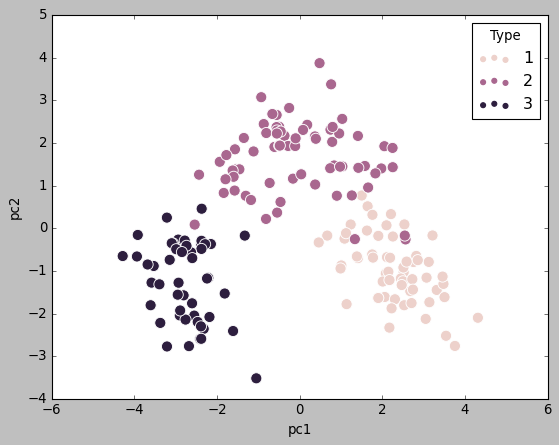

In [49]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type',s = 100)  

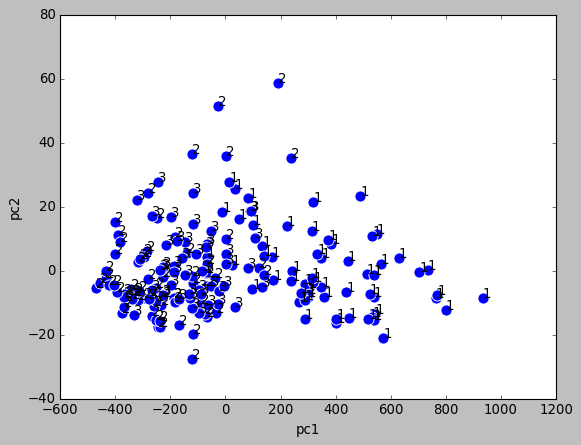

In [30]:
p1 = sns.scatterplot(data=finalDf,x='pc1',y='pc2',s = 100)  
for line in range(0,finalDf.shape[0]):
     p1.text(finalDf.pc1[line], finalDf.pc2[line], finalDf.Type[line], horizontalalignment='left', size='medium')
        

## Heirarchical Cluster perform Using first 3 principle component

In [51]:
df=finalDf.iloc[:,0:3]
df

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [52]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
data=pd.DataFrame(trans.fit_transform(df.iloc[:,0:]))
data

,0,1,2
0,0.884094,0.280447,0.445028
1,0.755241,0.520989,0.257653
2,0.790998,0.336264,0.560688
3,0.935332,0.102712,0.443975
4,0.615534,0.358103,0.665806
...,...,...,...
173,0.105908,0.175825,0.427221
174,0.195345,0.237971,0.482621
175,0.186515,0.102099,0.366964
176,0.220357,0.164852,0.406262


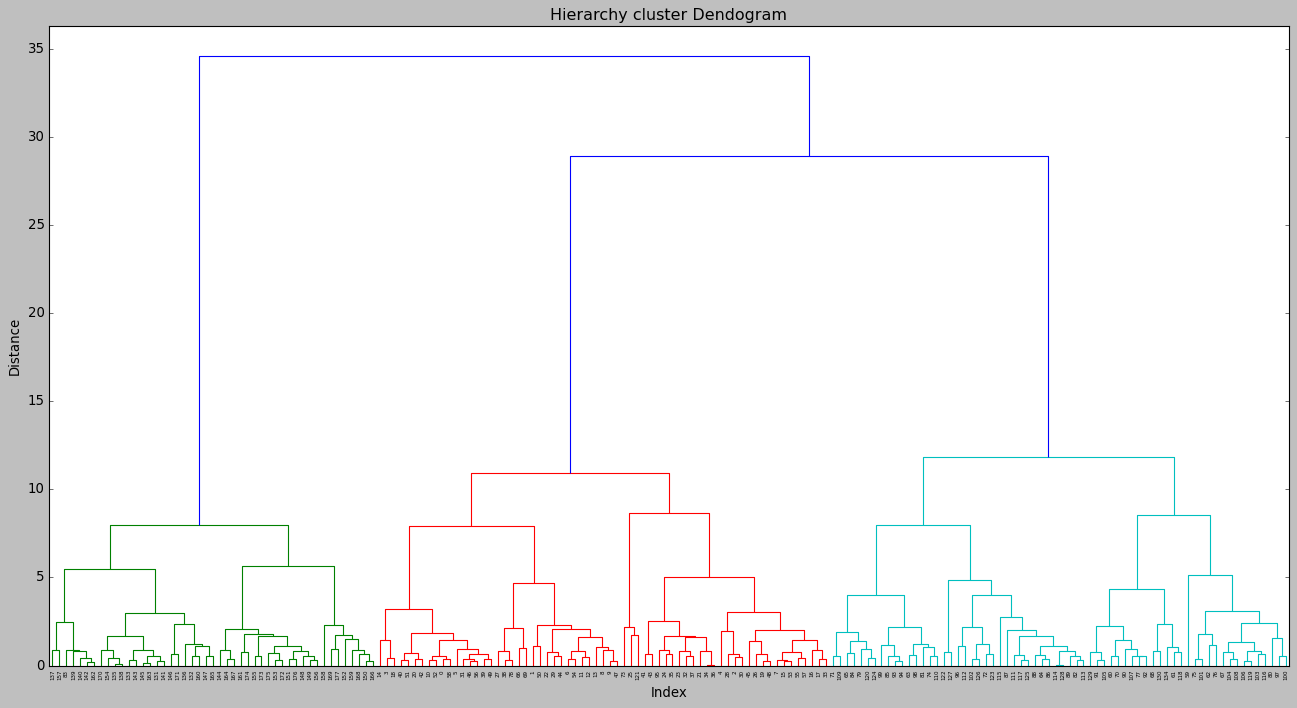

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(df,method="ward",metric="euclidean")
plt.figure(figsize=(20,10))
plt.title("Hierarchy cluster Dendogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(z)
plt.show()

In [54]:
from sklearn.cluster import AgglomerativeClustering 
h_complete=AgglomerativeClustering(n_clusters=6,linkage="ward",affinity="euclidean").fit(df)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels
df

,pc1,pc2,pc3,clust
0,3.316751,-1.443463,-0.165739,4
1,2.209465,0.333393,-2.026457,4
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,4
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


In [55]:
df.iloc[:,0:].groupby(df.clust).mean()

,pc1,pc2,pc3,clust
clust,,,,
0,-0.824478,1.802400,-0.840358,0.0
1,-2.782034,-1.272012,-0.136247,1.0
2,1.779398,-0.876328,0.472056,2.0
3,0.217686,1.655233,0.949557,3.0
4,2.676534,-0.817531,-0.847023,4.0
5,1.629543,-0.484734,4.180230,5.0


In [56]:
df2=df[df.clust==2]
df2.head()

,pc1,pc2,pc3,clust
2,2.516740,-1.031151,0.982819,2
4,1.008908,-0.869831,2.026688,2
7,2.059437,-1.608963,0.146282,2
15,2.305188,-1.662552,0.217903,2
16,2.171955,-2.327305,0.831730,2


In [57]:
df3=df[df.clust==3]
df3.head()

,pc1,pc2,pc3,clust
63,2.050262,1.925033,-0.007369,3
64,-0.609681,1.908059,0.679358,3
65,0.900228,0.763911,0.573361,3
71,1.657682,0.956712,1.952584,3
72,-0.725372,1.063645,0.080332,3


In [58]:
df5=df[df.clust==5]
df5.head()

,pc1,pc2,pc3,clust
25,0.990079,-0.940667,3.820908,5
73,2.562227,-0.260199,3.374394,5
121,1.336322,-0.253337,5.345388,5


In [59]:
df0=df[df.clust==0]
df0.head()

,pc1,pc2,pc3,clust
59,-0.928582,3.073486,-4.585064,0
60,-1.542480,1.381444,-0.874683,0
61,-1.836250,0.829984,-1.605702,0
62,0.030607,1.262786,-1.784408,0
67,0.183384,2.427146,-1.069746,0


In [60]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
df_subset=pd.DataFrame(scaler.fit_transform(df.iloc[:,0:3]))
df_subset

,0,1,2
0,1.528952,-0.913479,-0.137826
1,1.018516,0.210984,-1.685165
2,1.160164,-0.652552,0.817294
3,1.731928,-1.744339,-0.146518
4,0.465085,-0.550463,1.685357
...,...,...,...
173,-1.553740,-1.402553,-0.284875
174,-1.199446,-1.112043,0.172621
175,-1.234427,-1.747204,-0.782470
176,-1.100364,-1.453850,-0.457949


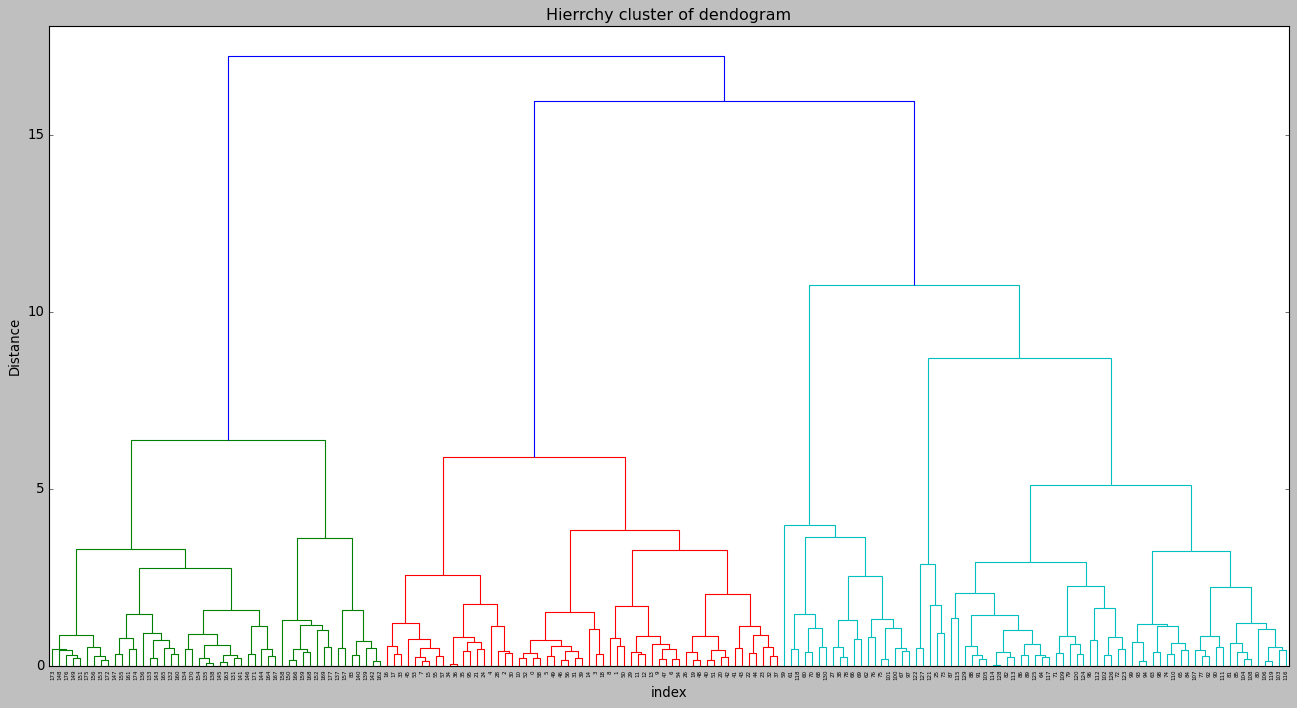

In [61]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt 
import seaborn as sns
z=linkage(df_subset,method="ward",metric="euclidean")
plt.figure(figsize=(20,10))
plt.title("Hierrchy cluster of dendogram")
plt.xlabel("index")
plt.ylabel("Distance")
sch.dendrogram(z)
plt.show()

In [62]:
from sklearn.cluster import AgglomerativeClustering 
h_complete=AgglomerativeClustering(n_clusters=6,linkage="ward",affinity="euclidean").fit(df_subset)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels
df

,pc1,pc2,pc3,clust
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,5
174,-2.601956,-1.757229,0.207581,5
175,-2.677839,-2.760899,-0.940942,5
176,-2.387017,-2.297347,-0.550696,5


In [63]:
df.iloc[:,0:].groupby(df.clust).mean()


,pc1,pc2,pc3,clust
clust,,,,
0,2.342066,-1.003375,-0.168998,0.0
1,-0.025595,1.799606,0.571388,1.0
2,-2.521518,-1.556093,0.968272,2.0
3,-0.064869,1.469406,-1.566959,3.0
4,0.422877,0.083582,3.782418,4.0
5,-2.887960,-1.090411,-0.667548,5.0


In [64]:
df0=df[df.clust==0]
df0.head()

,pc1,pc2,pc3,clust
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0


## In the above explanation in Hierarchy cluster,normalization and standard cluster follow the same data

## KMean Cluter perform Using first 3 principal component


In [66]:
df_Kmean=finalDf.iloc[:,0:3]
df_Kmean

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


C:\Users\UMANA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


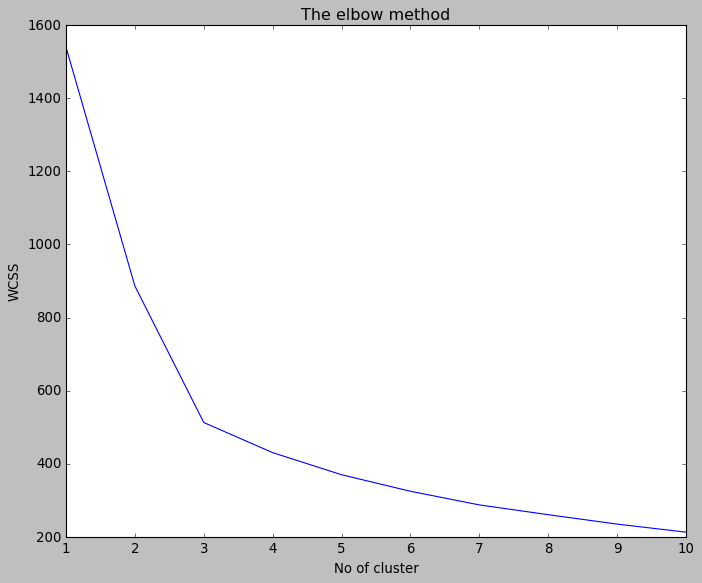

In [67]:
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(10,8))
WCSS=[]
for i in range(1,11):
    clf=KMeans(n_clusters=i)
    clf.fit(df_Kmean)
    WCSS.append(clf.inertia_)
plt.plot(range(1,11),WCSS)
plt.title("The elbow method")
plt.xlabel("No of cluster")
plt.ylabel("WCSS")
plt.show()


In [68]:
clf=KMeans(n_clusters=4)
y_KMeans=clf.fit_predict(df_Kmean)

In [69]:
y_KMeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 1, 0, 0, 3, 3,
       0, 0, 3, 0, 3, 3, 3, 2, 0, 0, 0, 3, 0, 3, 0, 0, 3, 1, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [70]:
clf.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 1, 0, 0, 3, 3,
       0, 0, 3, 0, 3, 3, 3, 2, 0, 0, 0, 3, 0, 3, 0, 0, 3, 1, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [71]:
clf.cluster_centers_

array([[ 0.67696294,  2.04793093, -0.8548442 ],
       [-2.72003575, -1.12565126, -0.23909324],
       [ 2.32704081, -0.97225046, -0.12958273],
       [-0.43821366,  1.43572314,  1.09436934]])

In [72]:
clf.inertia_

429.61967982630256

In [73]:
md=pd.Series(y_KMeans)
df_Kmean['clust']=md
df_Kmean

,pc1,pc2,pc3,clust
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


In [74]:
df_Kmean.iloc[:,0:].groupby(df_Kmean.clust).mean()

,pc1,pc2,pc3,clust
clust,,,,
0,0.676963,2.047931,-0.854844,0.0
1,-2.720036,-1.125651,-0.239093,1.0
2,2.327041,-0.972250,-0.129583,2.0
3,-0.438214,1.435723,1.094369,3.0


In [75]:
df_kmean0=df_Kmean[df_Kmean.clust==0]
df_kmean0.head()

,pc1,pc2,pc3,clust
38,1.502195,0.769432,-1.426177,0
59,-0.928582,3.073486,-4.585064,0
62,0.030607,1.262786,-1.784408,0
63,2.050262,1.925033,-0.007369,0
66,2.248507,1.884592,-2.031840,0


In [76]:
df_kmean1=df_Kmean[df_Kmean.clust==1]
df_kmean1.head()

,pc1,pc2,pc3,clust
61,-1.836250,0.829984,-1.605702,1
83,-2.538977,0.087443,0.474251,1
118,-2.433013,1.257141,-1.903027,1
130,-1.327102,-0.170389,-1.180013,1
131,-2.384501,-0.374583,-0.723823,1


In [77]:
df_kmean2=df_Kmean[df_Kmean.clust==2]
df_kmean2.head()

,pc1,pc2,pc3,clust
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2


In [78]:
df_kmean3=df_Kmean[df_Kmean.clust==3]
df_kmean3.head()

,pc1,pc2,pc3,clust
25,0.990079,-0.940667,3.820908,3
60,-1.542480,1.381444,-0.874683,3
64,-0.609681,1.908059,0.679358,3
65,0.900228,0.763911,0.573361,3
68,-0.812805,0.220514,-0.707005,3


In [79]:
plt.style.use(['classic'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'cluster using KMeans')

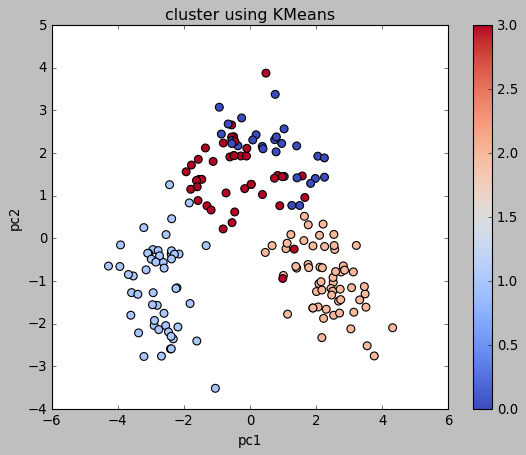

In [80]:
df_Kmean.plot(x="pc1",y="pc2",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm)
plt.title("cluster using KMeans")